In [121]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [122]:
plt.style.use('classic')

In [123]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

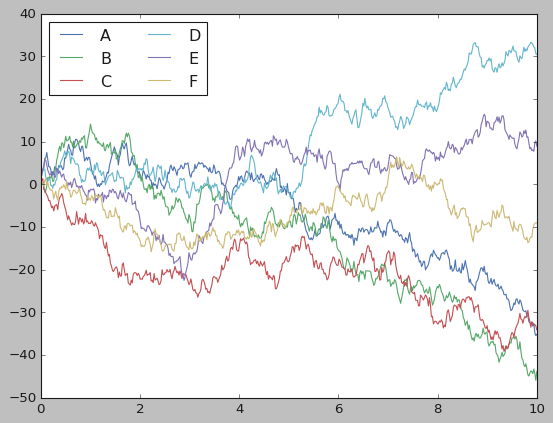

In [124]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

In [125]:
import seaborn as sns
sns.set()

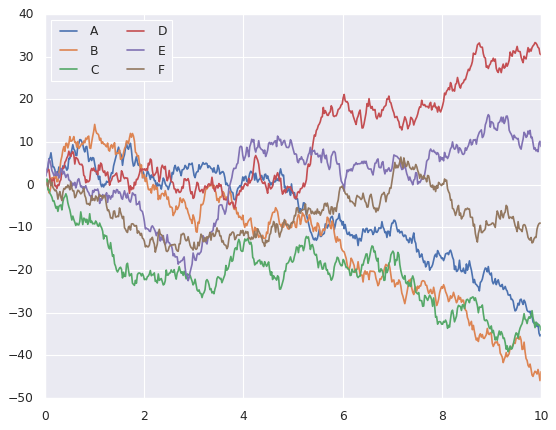

In [126]:
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

/Users/shimizukousuke/.pyenv/versions/3.6.5/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


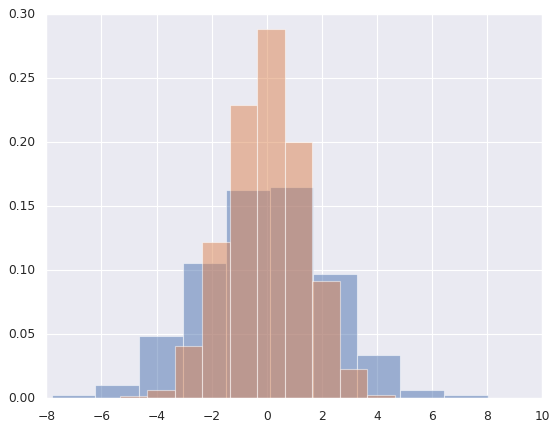

In [127]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])
for col in 'xy':
    plt.hist(data[col], normed=True, alpha=0.5)

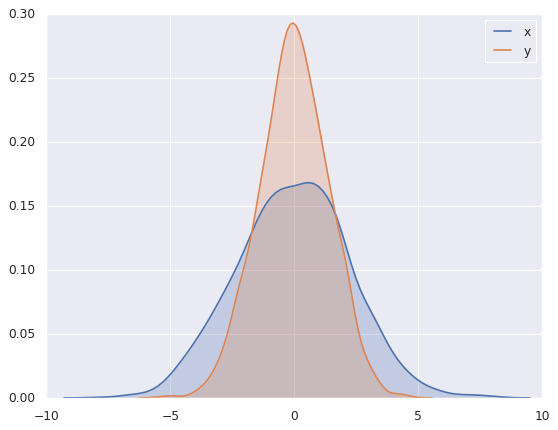

In [128]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

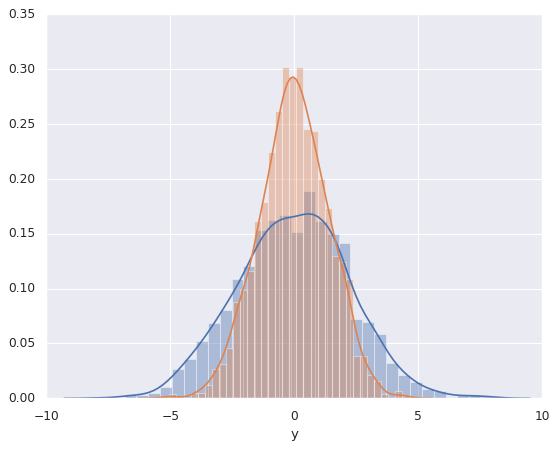

In [129]:
sns.distplot(data['x'])
sns.distplot(data['y'])

/Users/shimizukousuke/.pyenv/versions/3.6.5/lib/python3.6/site-packages/seaborn/distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


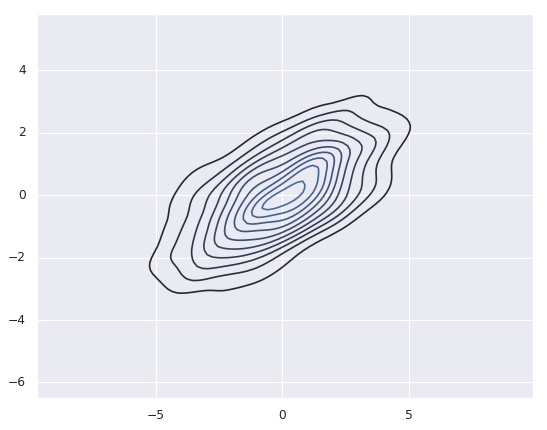

In [130]:
sns.kdeplot(data)

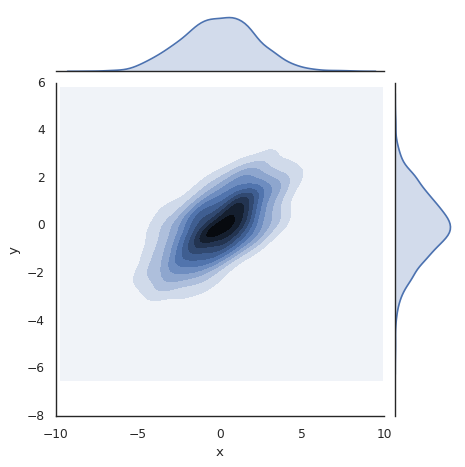

In [131]:
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind='kde')

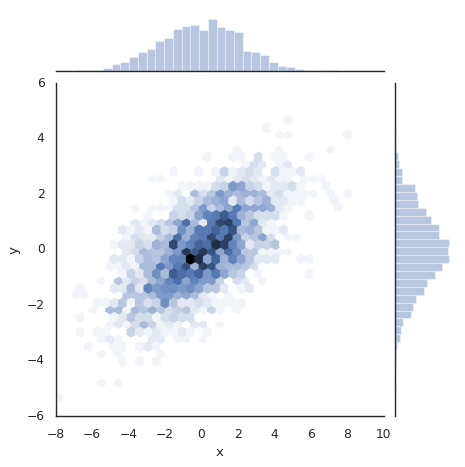

In [132]:
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind='hex')

In [133]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/Users/shimizukousuke/.pyenv/versions/3.6.5/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


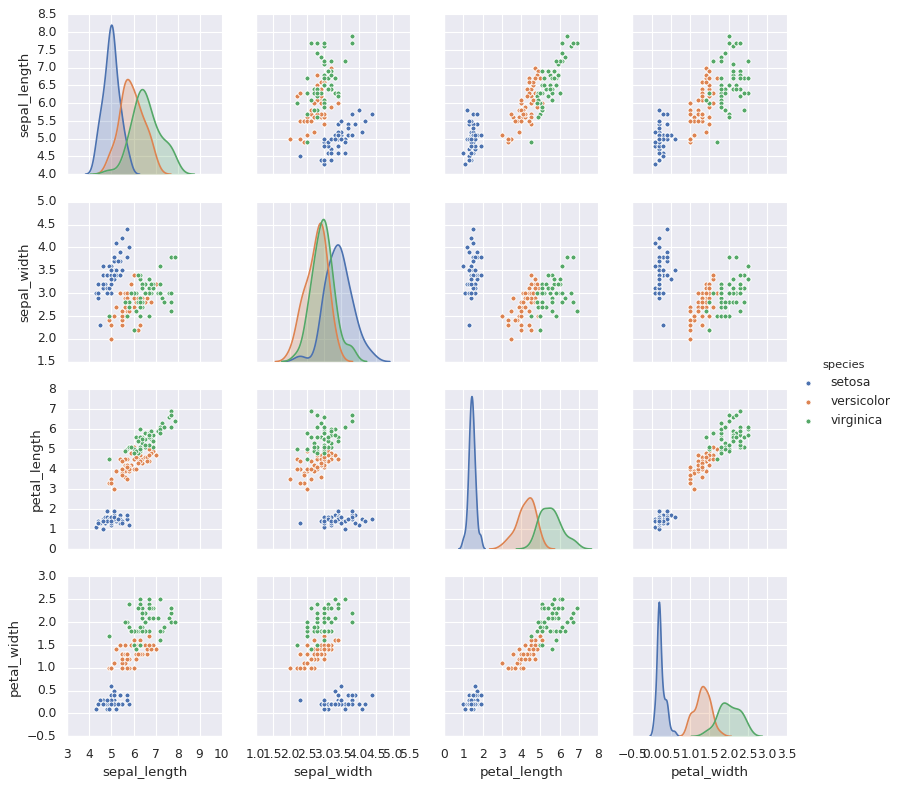

In [134]:
sns.pairplot(iris, hue='species', size=2.5)

In [135]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


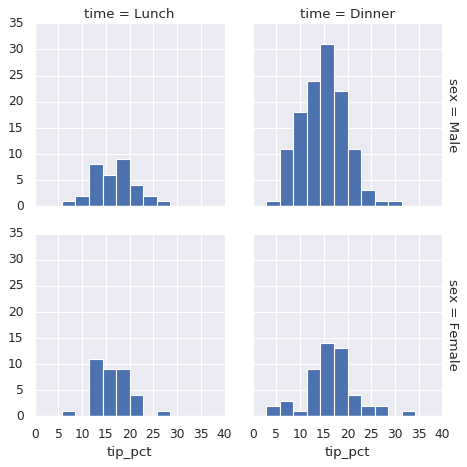

In [136]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, 'tip_pct', bins=np.linspace(0, 40, 15))

/Users/shimizukousuke/.pyenv/versions/3.6.5/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


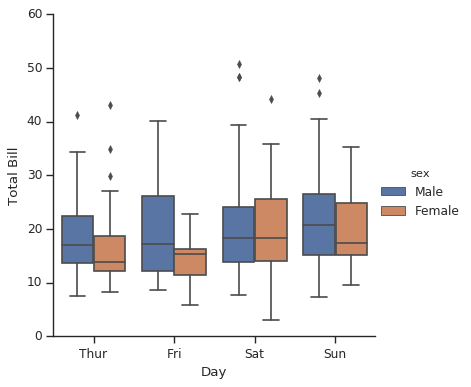

In [137]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot('day', 'total_bill', 'sex', data=tips, kind='box')
    g.set_axis_labels('Day', 'Total Bill')

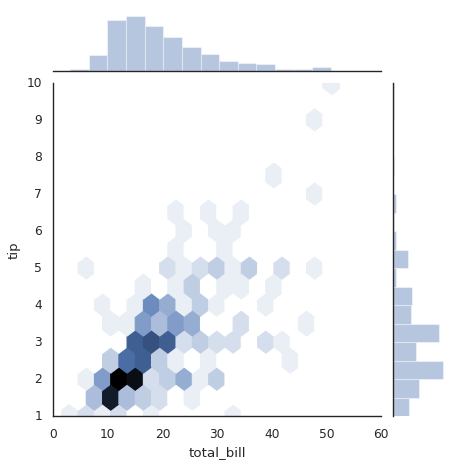

In [138]:
with sns.axes_style('white'):
    sns.jointplot('total_bill', 'tip', data=tips, kind='hex')

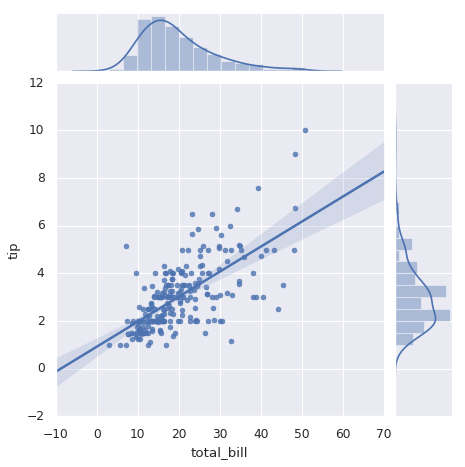

In [139]:
sns.jointplot('total_bill', 'tip', data=tips, kind='reg')

In [140]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


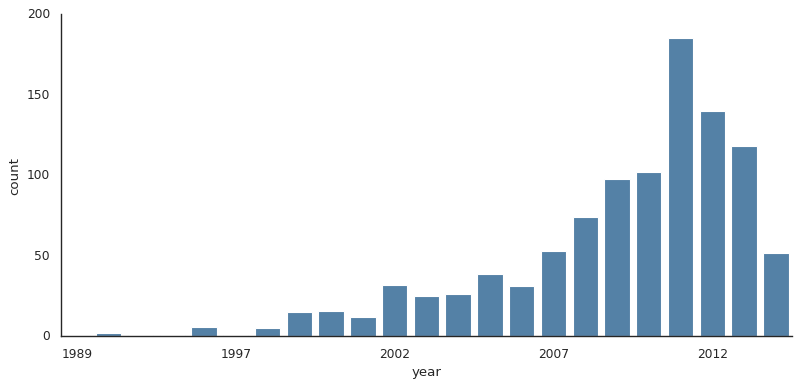

In [141]:
with sns.axes_style('white'):
    g = sns.factorplot('year', data=planets, aspect=2,
                                    kind='count', color='steelblue')
    g.set_xticklabels(step=5)

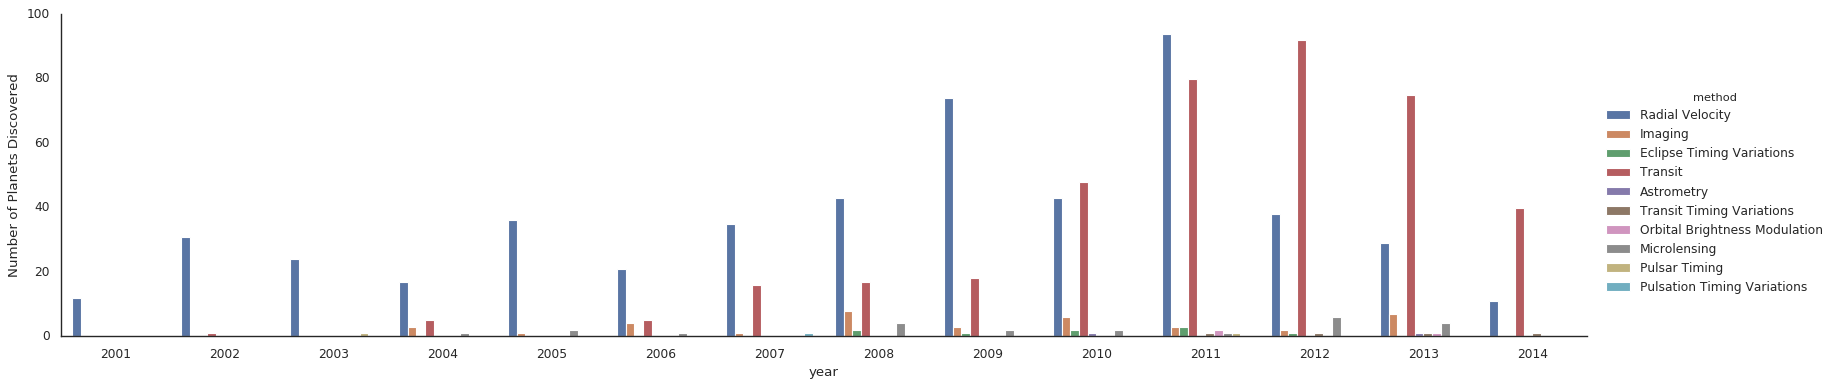

In [142]:
with sns.axes_style('white'):
    g = sns.factorplot('year', data=planets, aspect=4.0,
                                    kind='count', hue='method', order=range(2001, 2015))
    g.set_ylabels('Number of Planets Discovered')

In [143]:
# !curl -O https://raw.githubusercontent.com/jakevdp/marathon-data/master/marathon-data.csv

In [144]:
data = pd.read_csv('../data/marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [145]:
data.dtypes

age        int64
gender    object
split     object
final     object
dtype: object

In [146]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv('../data/marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [147]:
data.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [148]:
data['split_sec'] = data['split'].astype(int) / 1E9
data['final_sec'] = data['final'].astype(int) / 1E9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


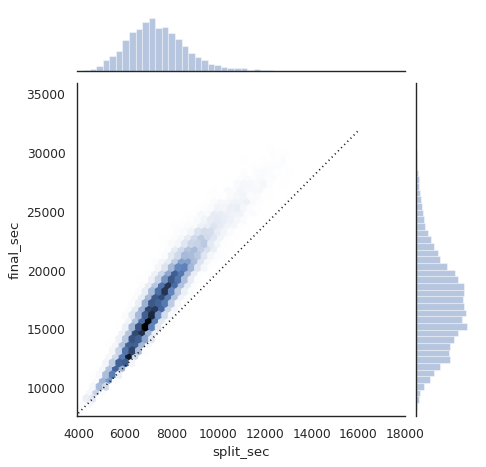

In [149]:
with sns.axes_style('white'):
    g = sns.jointplot('split_sec', 'final_sec', data, kind='hex')
    g.ax_joint.plot(np.linspace(4000, 16000), np.linspace(8000, 32000), ':k')

In [150]:
data['split_frac'] = 1 - 2*data['split_sec'] / data['final_sec']
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842


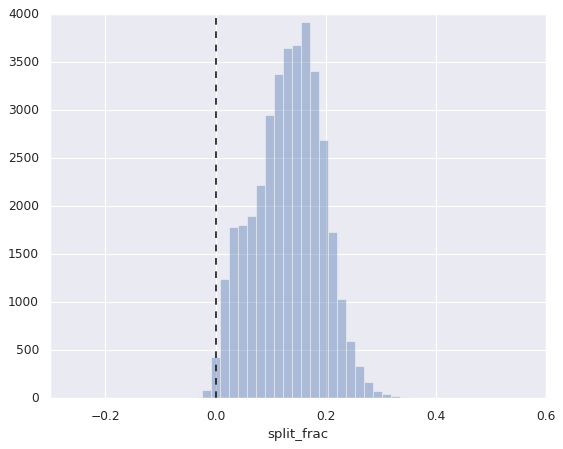

In [151]:
sns.distplot(data['split_frac'], kde=False)
plt.axvline(0, color='k', linestyle='--')

In [152]:
sum(data['split_frac'] < 0)

251

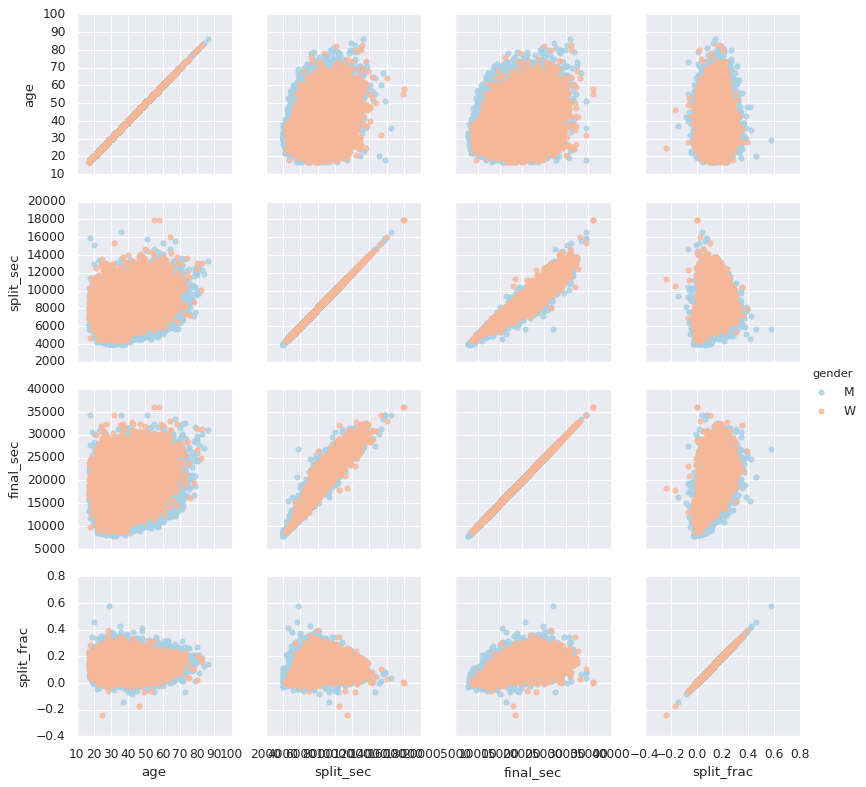

In [153]:
g = sns.PairGrid(data, vars=['age', 'split_sec', 'final_sec', 'split_frac'], hue='gender', palette='RdBu_r')
g.map(plt.scatter, alpha=0.8)
g.add_legend()

Text(0.5, 0, 'split_frac')

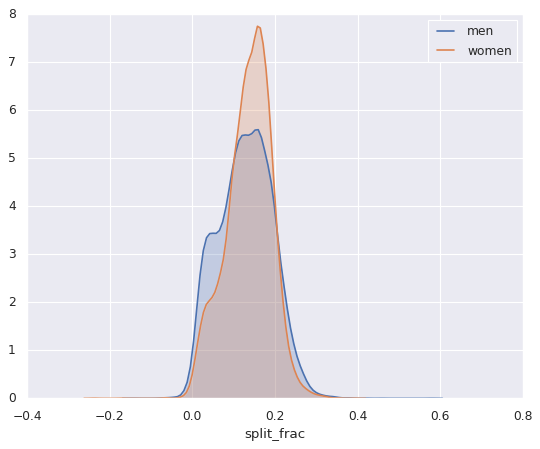

In [154]:
sns.kdeplot(data['split_frac'][data['gender'] =='M'], label='men', shade=True)
sns.kdeplot(data['split_frac'][data['gender'] =='W'], label='women', shade=True)
plt.xlabel('split_frac')

## バイオリンプロット

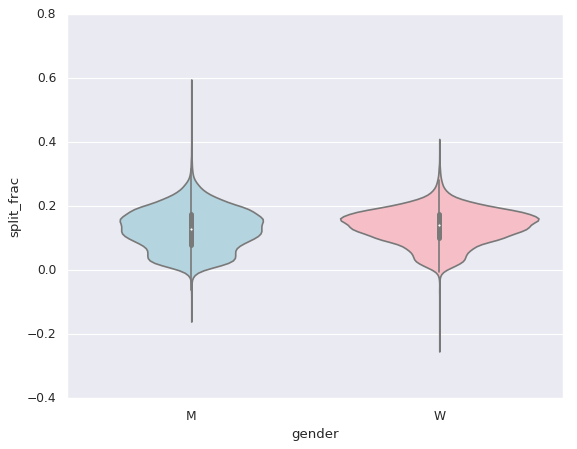

In [155]:
sns.violinplot('gender', 'split_frac', data=data, palette=['lightblue', 'lightpink'])

In [156]:
data['age_dec'] = data['age'].map(lambda age:10 * (age//10))
data.head()

,age,gender,split,final,split_sec,final_sec,split_frac,age_dec
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756,30
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262,30
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443,30
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097,30
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842,30


In [157]:
men = (data['gender'] == 'M')
women = (data['gender'] == 'W')

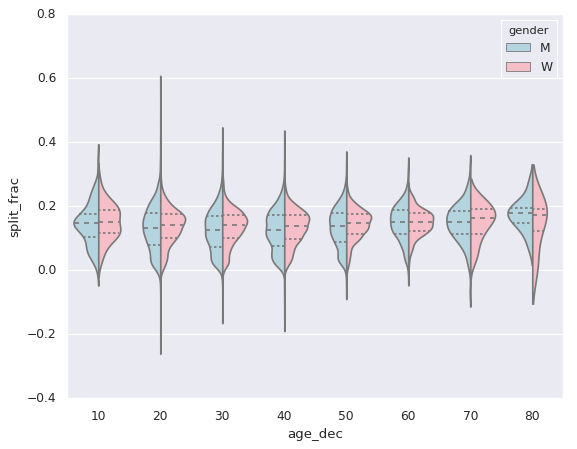

In [158]:
with sns.axes_style(style=None):
    sns.violinplot('age_dec', 'split_frac', hue='gender', data=data,
                              split=True, inner='quartile', palette=['lightblue', 'lightpink'])

In [159]:
sum(data['age'] >= 80)

15

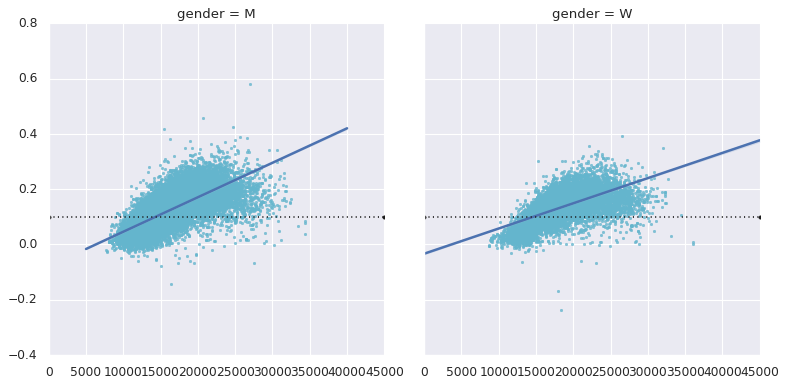

In [161]:
g = sns.lmplot('final_sec', 'split_frac', col='gender', data=data,
               markers=".", scatter_kws=dict(color='c'))
g.map(plt.axhline, y=0.1, color="k", ls=":");